# Assignment-1

Due on September, 27.


This exercise will require you to pull some data from the `yahoo finance`. Yahoo finance is currently the one of most widely used API of financial market data.

Yahoo finance has a large number of data sources, but, you restrict your attention to the extraction of the stock price.

For this assignment, we will focus on Apple and Microsoft stock prices data from the S&P-500, a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States. You'll analyze these stock prices. These company are listed under the stock ticker `aapl` and `msft`.

These are your tasks for this mini project:

1. Collect daily closing price stock price of Apple and Microsoft covering the period of 2020-01-01 - 2021-01-01 (keep in mind that the date format is YYYY-MM-DD). (15 pts)
2. Draw the line plot for the stock prices and interpret the stock price movement, if there is any. (15 pts)
3. Calculate stock return of Apple and Microsoft in this period. (15 pts)
4. What is the largest return of these companies during this period? (15 pts)
5. Draw the histogram of the returns and interpret the distributions you obtained. (15 pts)
6. Use QQ plot and see if the stock returns follow normal distribution. (15 pts)
7. Calculate the correlation coefficient between these stock returns and interpret. (10 pts)



In [2]:
! pip3 install yfinance

In [3]:
import yfinance as yf

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

#### 1.Collect daily closing price stock price of Apple and Microsoft covering the period of 2020-01-01 - 2021-01-01 (keep in mind that the date format is YYYY-MM-DD).

In [51]:
stocks = [ 'AAPL', 'MSFT'] 
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2021, 1, 1)
port = yf.download(stocks, start=start, end=end, interval='1d')

[*********************100%***********************]  2 of 2 completed


In [52]:
port.head()

Adj Close                  Close                   High  \
                 AAPL        MSFT       AAPL        MSFT       AAPL   
Date                                                                  
2020-01-02  73.683563  156.592010  75.087502  160.619995  75.150002   
2020-01-03  72.967224  154.642136  74.357498  158.619995  75.144997   
2020-01-06  73.548637  155.041885  74.949997  159.029999  74.989998   
2020-01-07  73.202744  153.628250  74.597504  157.580002  75.224998   
2020-01-08  74.380287  156.075302  75.797501  160.089996  76.110001   

                              Low                   Open              \
                  MSFT       AAPL        MSFT       AAPL        MSFT   
Date                                                                   
2020-01-02  160.729996  73.797501  158.330002  74.059998  158.779999   
2020-01-03  159.949997  74.125000  158.059998  74.287498  158.320007   
2020-01-06  159.100006  73.187500  156.509995  73.447502  157.080002   
2020-01-07  159.669998  74.370003  157.320007  74.959999  159.320007   
2020-01-08  160.800003  74.290001  157.949997  74.290001  158.929993   

               Volume            
                 AAPL      MSFT  
Date                             
2020-01-02  135480400  22622100  
2020-01-03  146322800  21116200  
2020-01-06  118387200  20813700  
2020-01-07  108872000  21634100  
2020-01-08  132079200  27746500

In [53]:
port_close = port['Close']

In [54]:
port_close

,AAPL,MSFT
Date,,
2020-01-02,75.087502,160.619995
2020-01-03,74.357498,158.619995
2020-01-06,74.949997,159.029999
2020-01-07,74.597504,157.580002
2020-01-08,75.797501,160.089996
...,...,...
2020-12-24,131.970001,222.750000
2020-12-28,136.690002,224.960007
2020-12-29,134.869995,224.149994


### 2.Draw the line plot for the stock prices and interpret the stock price movement, if there is any.

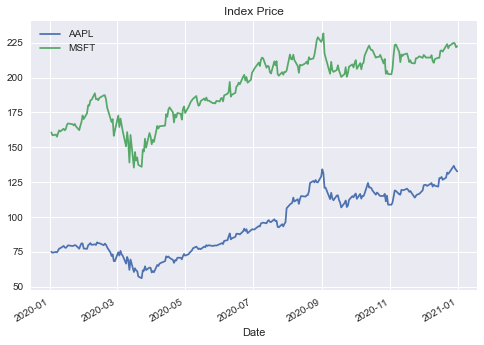

In [55]:
port_close.plot()
plt.xlabel('Date')
plt.title('Index Price')
plt.show()

from the above plot it is observed that stock prices for both apple and microsoft intially decreased and gradually started increasing from april. and stock price of microsoft is higher than the stock price of apple.the maximum stock prices for apple and microsoft are approximately 130 and 230 respectively and minimum stock price for apple and microsoft are approximately 55 and 130 respectively.

### 3.Calculate stock return of Apple and Microsoft in this period

In [56]:
port_close.pct_change()

,AAPL,MSFT
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.009722,-0.012452
2020-01-06,0.007968,0.002585
2020-01-07,-0.004703,-0.009118
2020-01-08,0.016086,0.015928
...,...,...
2020-12-24,0.007712,0.007827
2020-12-28,0.035766,0.009921
2020-12-29,-0.013315,-0.003601


these are the stock return for apple and microsoft from  jan 2020 to jan 2021

### 4.What is the largest return of these companies during this period?

In [57]:
port_close.pct_change().max()

AAPL    0.119808
MSFT    0.142169
dtype: float64

the largest stock return for apple is 0.1198 


the largest stock return for microsfot is 0.1421

<AxesSubplot:xlabel='Date'>

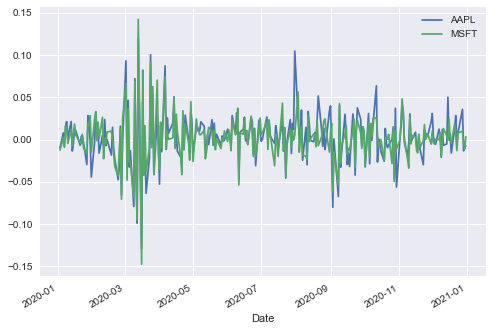

In [58]:
port_close.pct_change().plot()

### 5.Draw the histogram of the returns and interpret the distributions you obtained.

array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'MSFT'}>]], dtype=object)

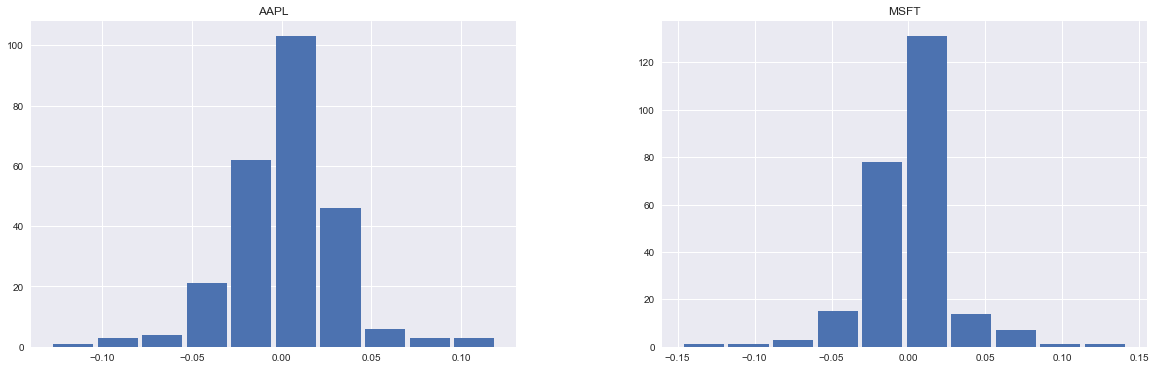

In [59]:
port_close.pct_change().hist(grid=True, bins=10, rwidth=0.9,figsize=(20,6))

from the above histograms of stock returns for apple and microsoft it is observed that microsoft has more returns than apple at 0.00

### 6.Use QQ plot and see if the stock returns follow normal distribution.

In [60]:
import statsmodels.api as sm
import pylab as py

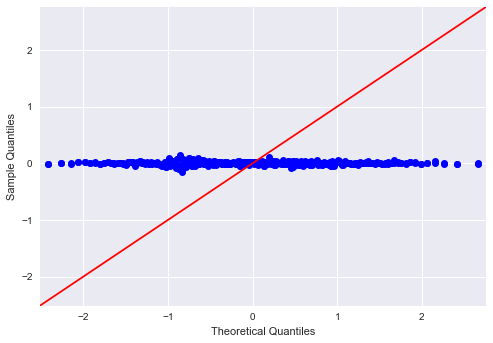

In [61]:
sm.qqplot(port_close.pct_change(), line ='45')
py.show()

from the above QQ plot it is observed that all quantiles are not even close to the 45 degree straight line,it indicates that the stock returns doesnt have any similar distributions.stock returns are not following normal distribution. 

### 7.Calculate the correlation coefficient between these stock returns and interpret

In [62]:
port_close.pct_change().corr()

,AAPL,MSFT
AAPL,1.000000,0.838892
MSFT,0.838892,1.000000


In [63]:
import seaborn as sns

<AxesSubplot:>

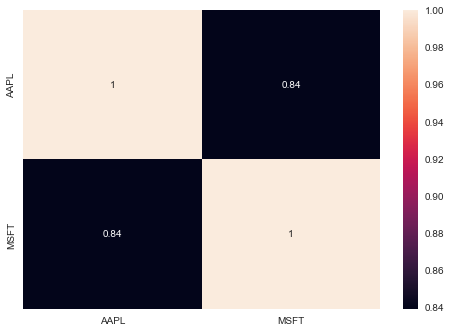

In [64]:
sns.heatmap(port_close.pct_change().corr(),annot=True)

correlation coefficient for stock returns between apple and microsoft is 0.84 which is approximately close to 1 which indicates there is positive correlation between stock returns of apple and microsoft.

# ref:
1.https://www.codingfinance.com/post/2018-04-03-calc-returns-py/

2.https://realpython.com/python-histograms/

3.https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/

4.https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04

5.http://localhost:8889/notebooks/Downloads/Financial%20Data%20Sources%20and%20APIs%20(1).ipynb